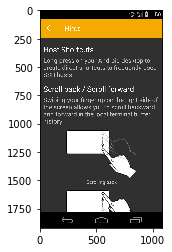

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/yanrankou/Documents/workspace/dataset/connectbot"
CATEGORIES = os.listdir(DATADIR)

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
IMG_SIZE = 50

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

print(len(training_data))

50


In [4]:
X = []
y = []

In [5]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [6]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [8]:
X[1]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[221, 221, 221],
        [221, 221, 221],
        [221, 221, 221],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(50,activation = 'softmax'))

model.compile(loss = "sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
model.fit(X, y, epochs=10)

Train on 50 samples
Epoch 1/10
50/50 [==============================] - 1s 14ms/sample - loss: 3.9811 - accuracy: 0.0200
Epoch 2/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.8643 - accuracy: 0.0400
Epoch 3/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.7922 - accuracy: 0.1000
Epoch 4/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.7078 - accuracy: 0.1000
Epoch 5/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.5909 - accuracy: 0.1200
Epoch 6/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.4140 - accuracy: 0.1600
Epoch 7/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.2591 - accuracy: 0.1800
Epoch 8/10
50/50 [==============================] - 0s 2ms/sample - loss: 3.0682 - accuracy: 0.3400
Epoch 9/10
50/50 [==============================] - 0s 2ms/sample - loss: 2.8826 - accuracy: 0.3400
Epoch 10/10
50/50 [==============================] - 0s 2ms/sample - loss: 2.64